In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [61]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [62]:
import DiadFit as pf
pf.__version__

'0.0.29'

In [63]:
DayFolder=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Diad_Fitting_Nov22nd2022'
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [64]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

## Now load the files of interest

In [65]:
Diad_Files_Dense = joblib.load('Diad_Files_Dense.sav')

In [66]:
# Select one file to tweak fit on
filename_Dense=Diad_Files_Dense[0]
filename_Dense

'POC8.txt'

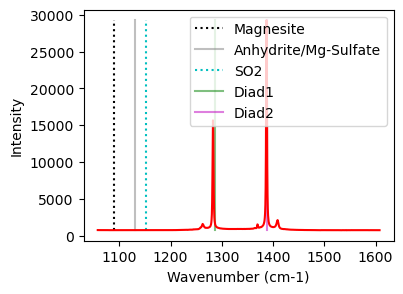

In [67]:
plot1=pf.plot_diad(path=spectra_path, filename=filename_Dense, filetype=filetype)

## Decide if you want a secondary peak
- If you dont have the peak, it is only a little slower, but it works if it only appears in a small number of spectra still

Peak_Cent_SO2  Peak_Area_SO2  Peak_Height_SO2
0    1150.553559     773.903183       501.982252

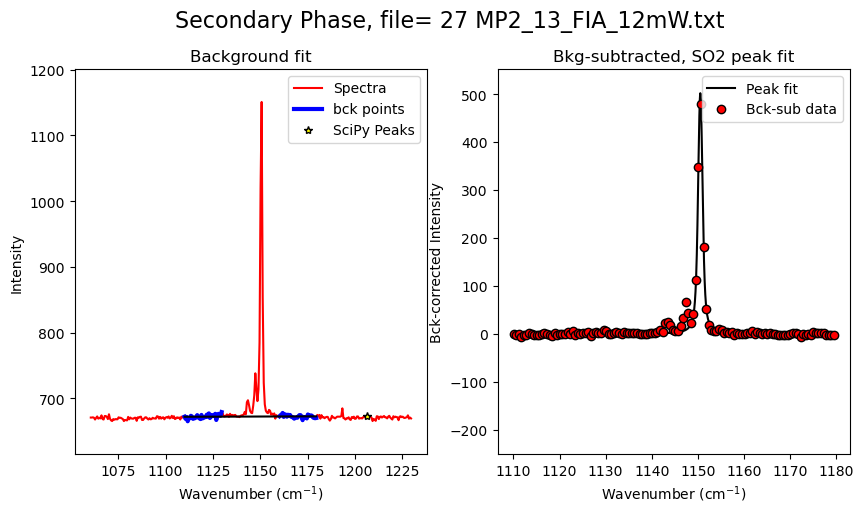

In [9]:
# Decide if you want to fit a carbonate peak or not here. 
fit_sec_peak=True

# Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
generic_Config=pf.generic_peak_config(lower_bck=(1110, 1130), 
upper_bck=(1160, 1180), cent_generic=1150, name='SO2')

generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
filename=filename_Dense, filetype=filetype)
generic_fit

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [10]:
diad_id_config=pf.diad_id_config(height=50)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1295), height=50, distance=5, threshold=0.5, width=0.5, prominence=10, plot_figure=True)

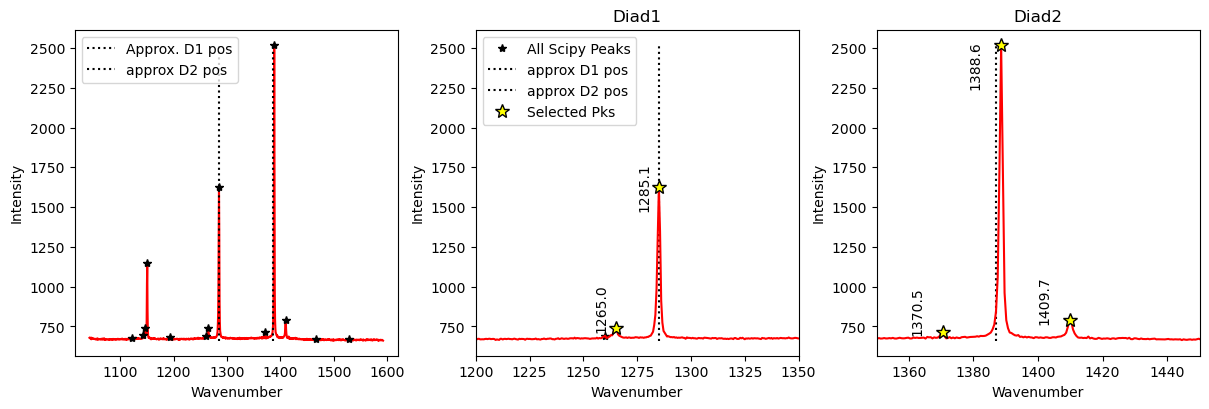

In [11]:
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=2
n_peaks_diad2=3
    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(
    config=diad_id_config, path=spectra_path, filename=filename_Dense,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2)

In [12]:
## Choose a model - option, pseudovoigt or voigt
model_name='PseudoVoigtModel'

## Fit Diad 1
- You can tweak the parameters in diad1_fit_config

In [21]:
diad1_fit_config_init=pf.diad1_fit_config(model_name=model_name,
diad_sigma=0.4, sigma_allowance=2, upper_bck_diad1=(1310, 1350),
x_range_residual=10, x_range_baseline=30, HB_amplitude=5, diad_amplitude=1000)
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.4, sigma_allowance=2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1310, 1350), diad_amplitude=1000, HB_amplitude=5, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  \
0          1285.079616       1285.079666       1979.395315           0.756775   

  Diad1_Voigt_Gamma  Diad1_Combofit_Height  Diad1_Prop_Lor     HB1_Cent  \
0              None             953.845002        0.694362  1264.882711   

     HB1_Area  Residual_Diad1  Diad1_refit  
0  251.688839        3.351905        False

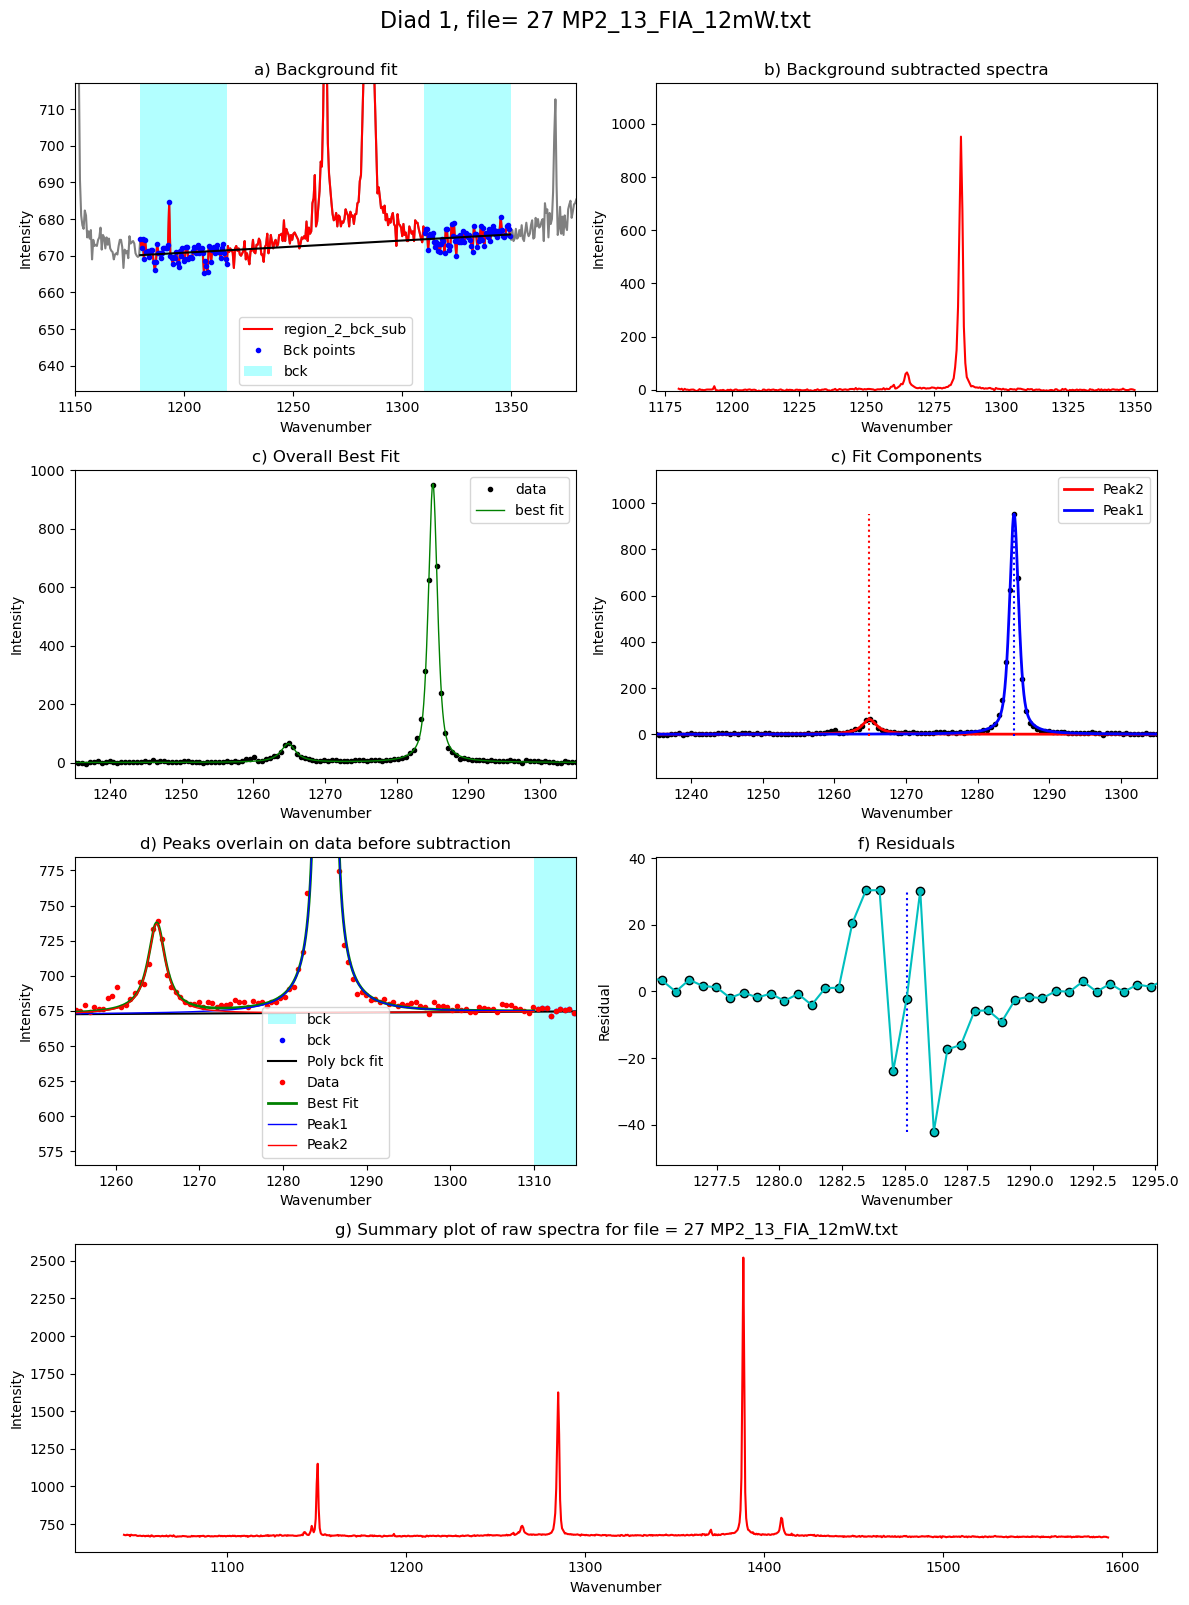

In [22]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename_Dense, filetype=filetype, close_figure=False)
Diad1_fit

In [30]:
### Now lets update the tweakable parameters with the sigma values
diad1_fit_config=diad1_fit_config_init
diad1_fit_config.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]
diad1_fit_config.sigma_allowance=2
diad1_fit_config

diad1_fit_config(model_name='PseudoVoigtModel', peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.7567747127629405, sigma_allowance=2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1310, 1350), diad_amplitude=1000, HB_amplitude=5, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=12, return_other_params=False)

## Fit diad 2

In [47]:
diad2_fit_config_init=pf.diad2_fit_config(peak_pos_gauss=1390,
model_name=model_name,  gauss_sigma=25,
x_range_residual=10, lower_bck_diad2=(1310, 1350),
diad_amplitude=1000, 
x_range_baseline=30)
diad2_fit_config_init


diad2_fit_config(model_name='PseudoVoigtModel', peak_pos_gauss=1390, gauss_sigma=25, gauss_amp=3000, diad_sigma=0.2, sigma_allowance=10, N_poly_bck_diad2=1, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), diad_amplitude=1000, HB_amplitude=20, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_Voigt_Area  Diad2_Voigt_Sigma  \
0           1388.55171        1388.55166       2952.805252           0.600091   

  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area     C13_Cent   C13_Area  \
0              None  1409.935926  300.231248  1370.308558  39.746795   

   Diad2_Combofit_Height  Residual_Diad2  Diad2_Prop_Lor  Gauss_Cent  \
0             1850.11833        3.183421        0.628278  1389.33842   

   Gauss_Area  Gauss_Sigma  Diad2_refit  
0  436.933324     25.81105        False

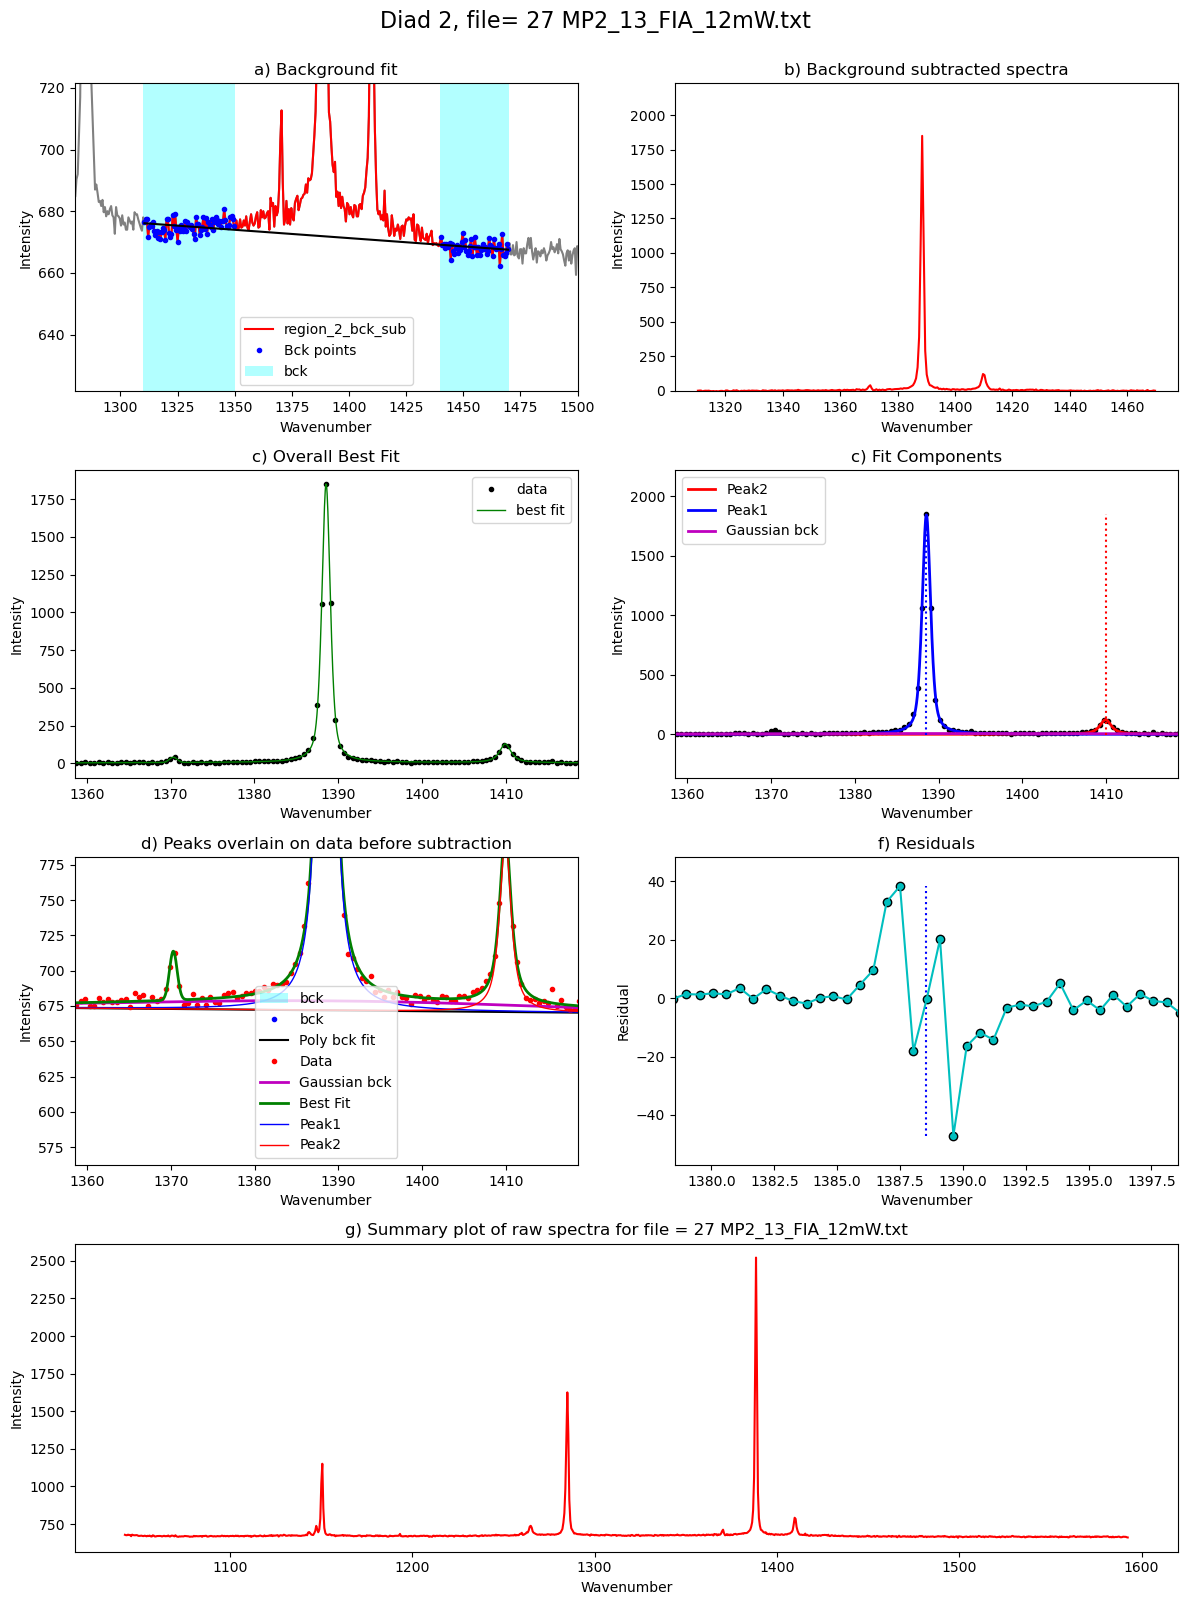

In [48]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=spectra_path, filename=filename_Dense, filetype=filetype, close_figure=False)
Diad2_fit

In [49]:
# Update param with new sigma
diad2_fit_config=diad2_fit_config_init
diad2_fit_config.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
diad2_fit_config.sigma_allowance=2
diad2_fit_config

diad2_fit_config(model_name='PseudoVoigtModel', peak_pos_gauss=1390, gauss_sigma=25, gauss_amp=3000, diad_sigma=0.6000905440974869, sigma_allowance=2, N_poly_bck_diad2=1, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), diad_amplitude=1000, HB_amplitude=20, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

## You can also try looping if all your spectra are pretty similar

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.09s/it]


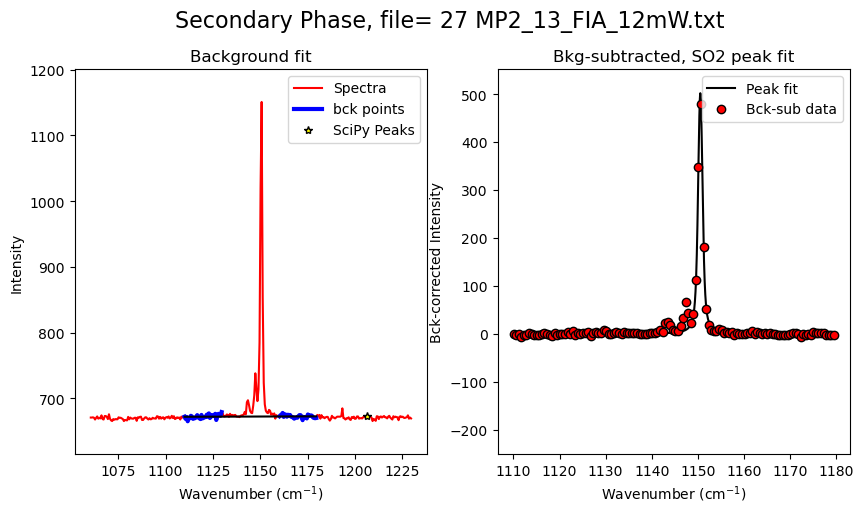

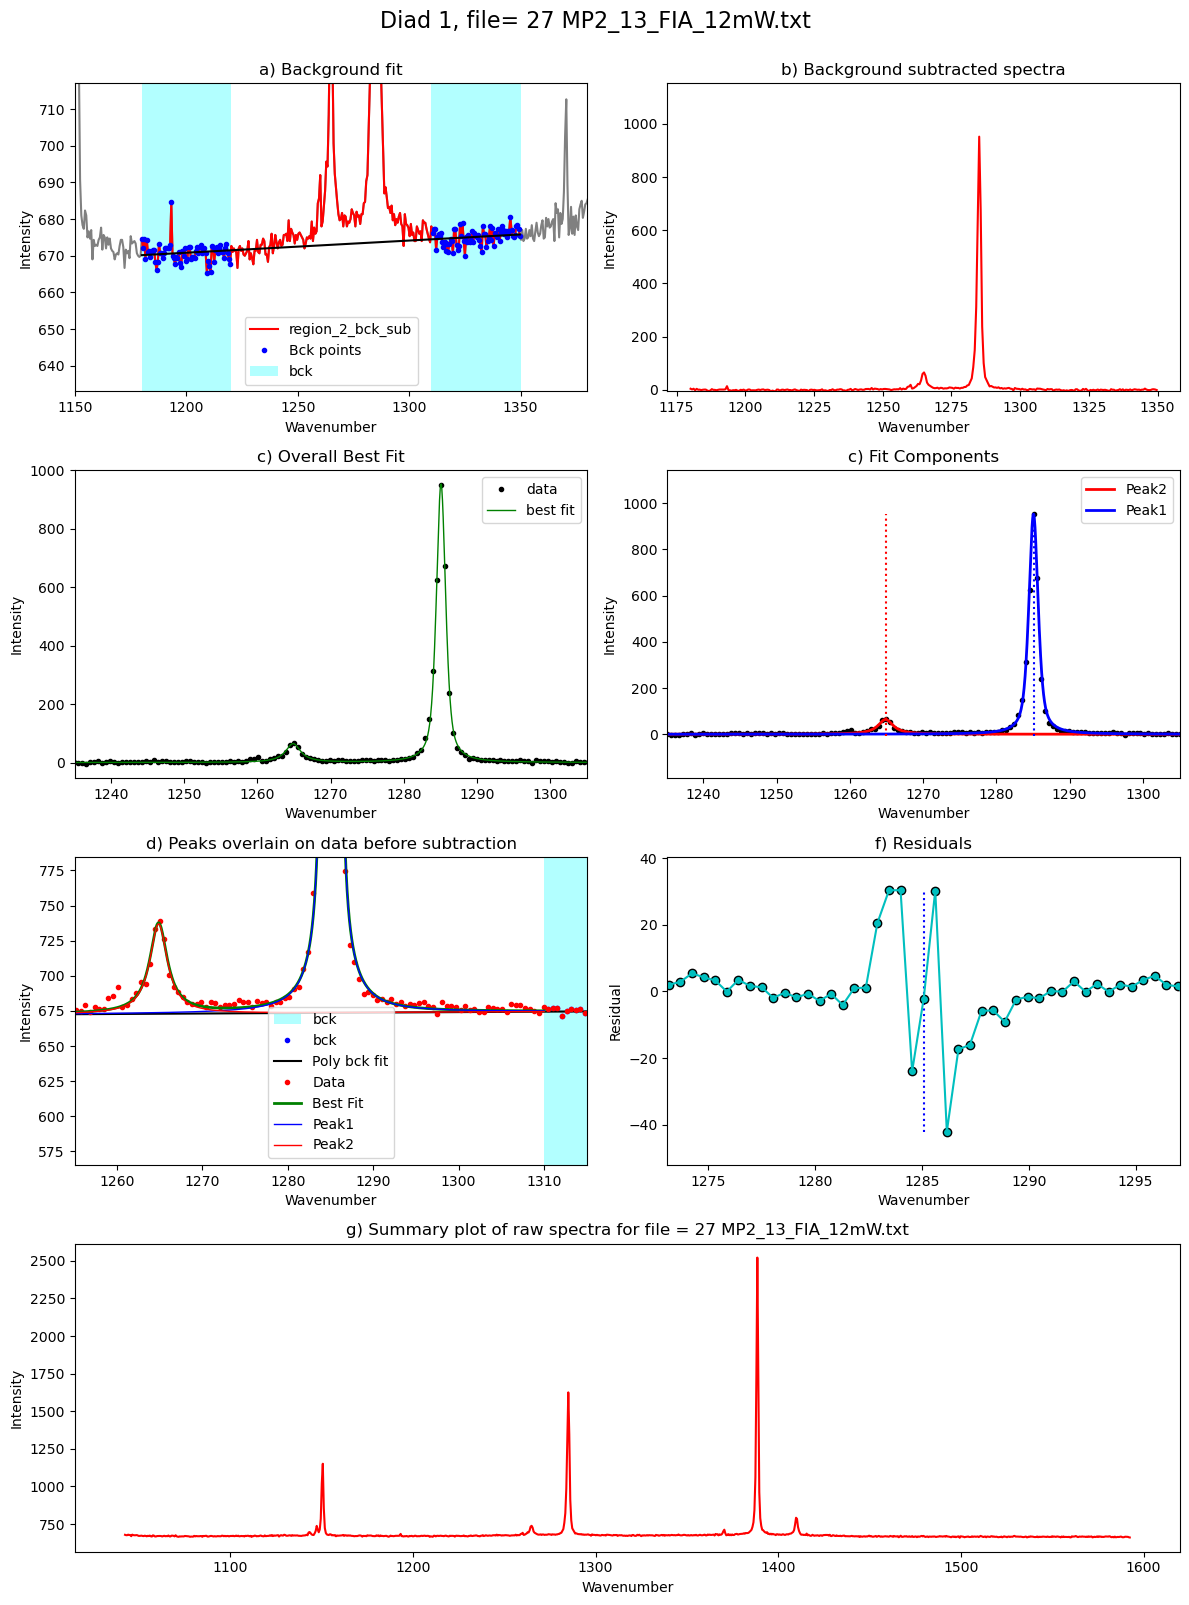

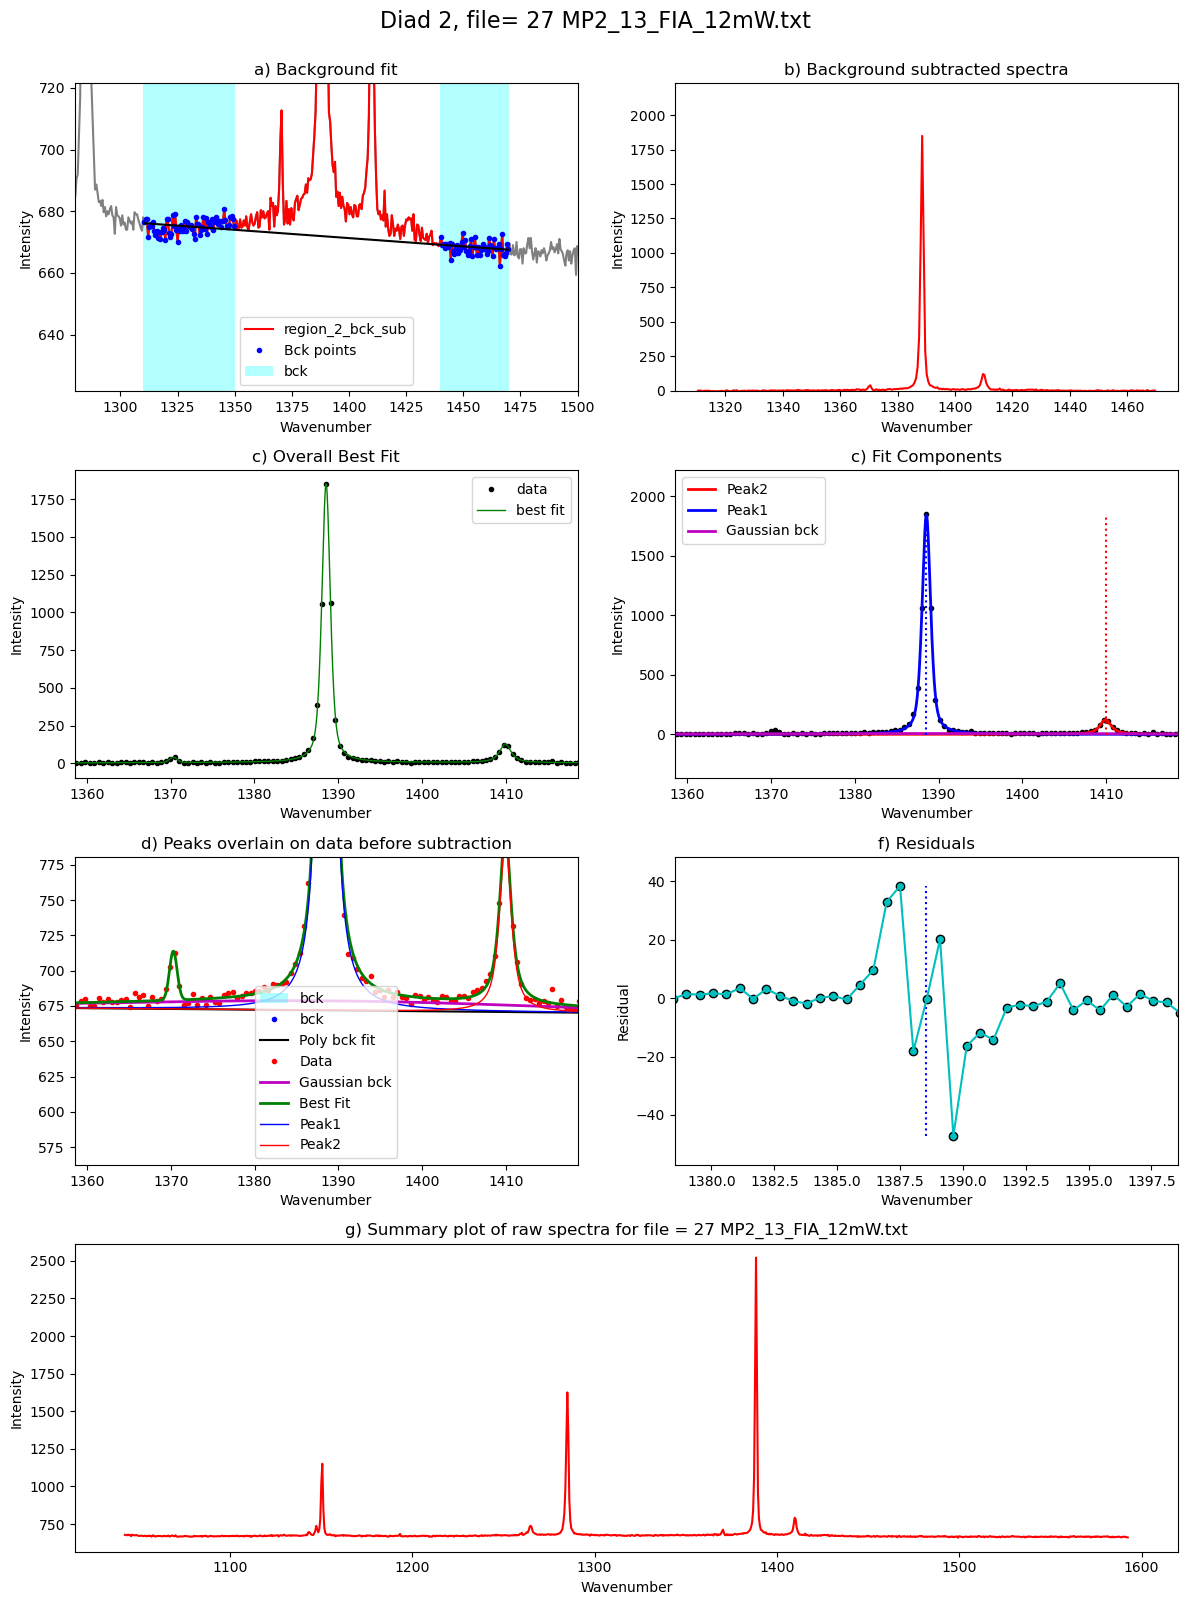

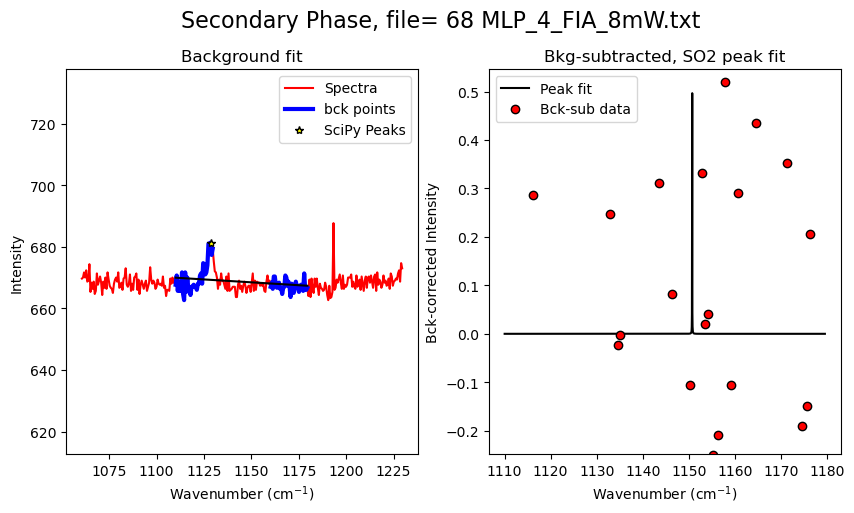

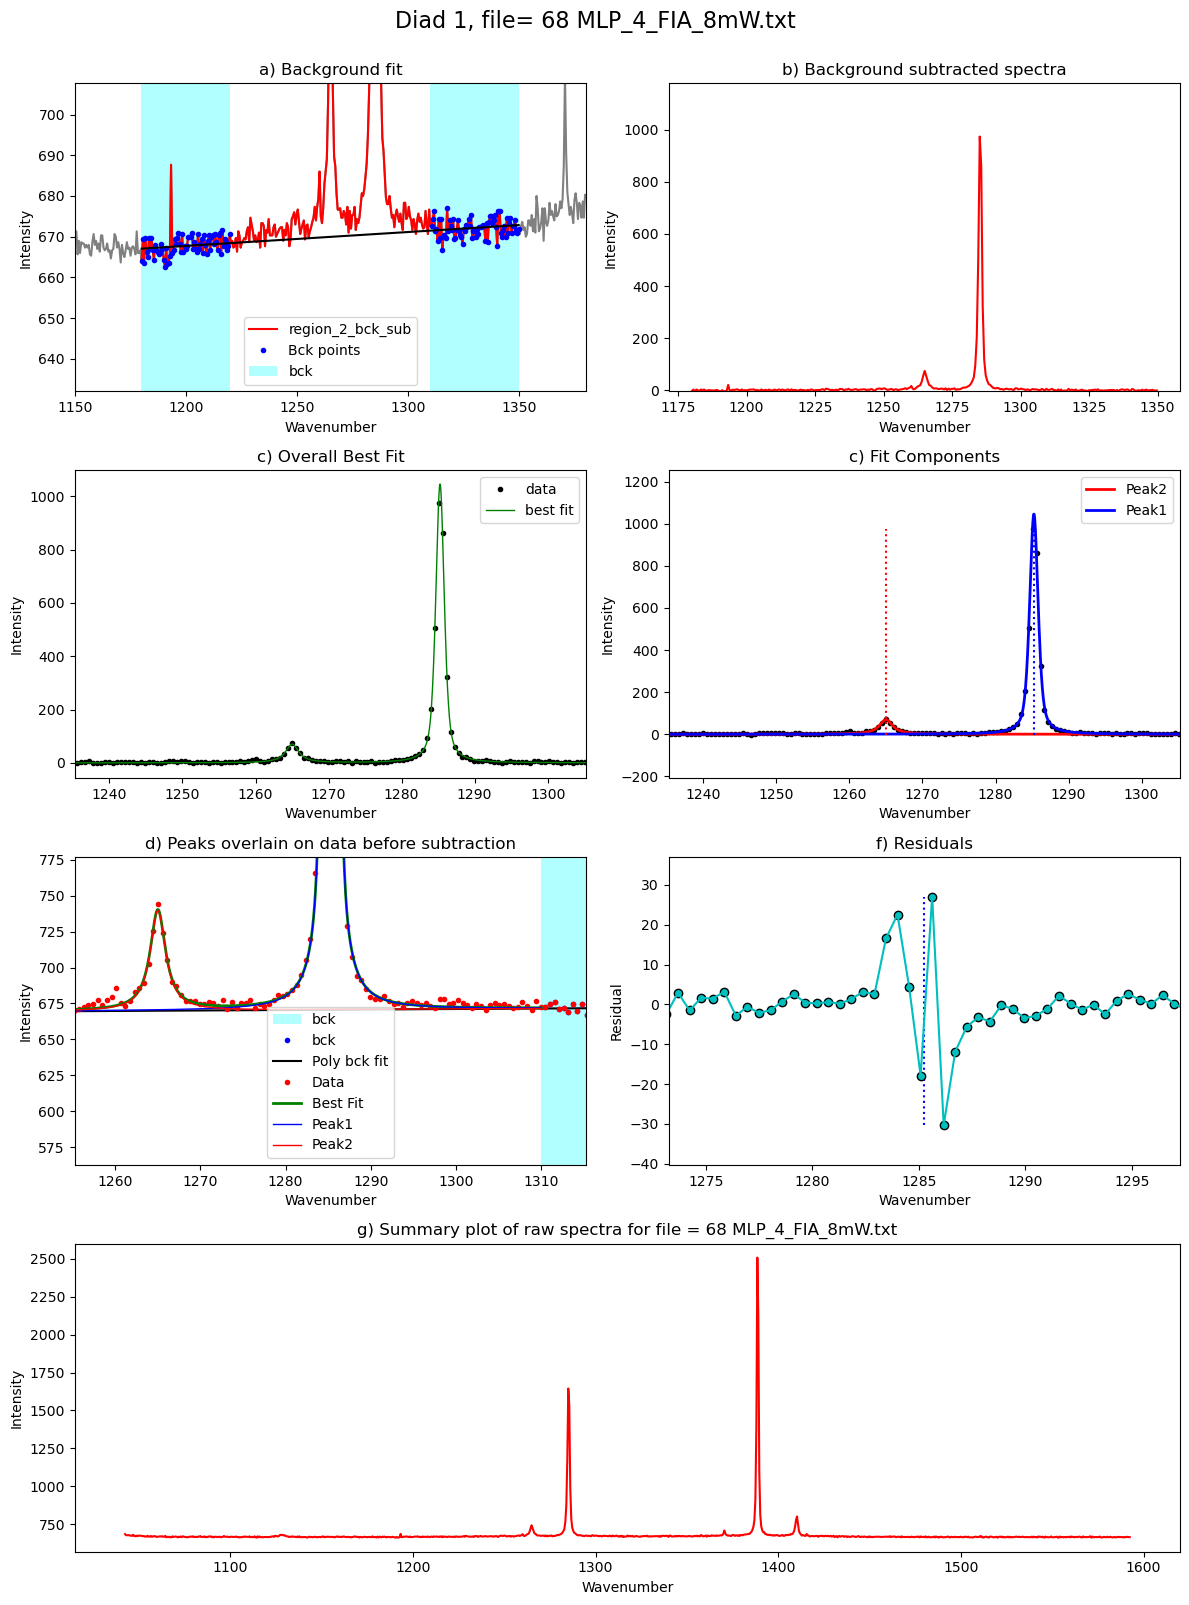

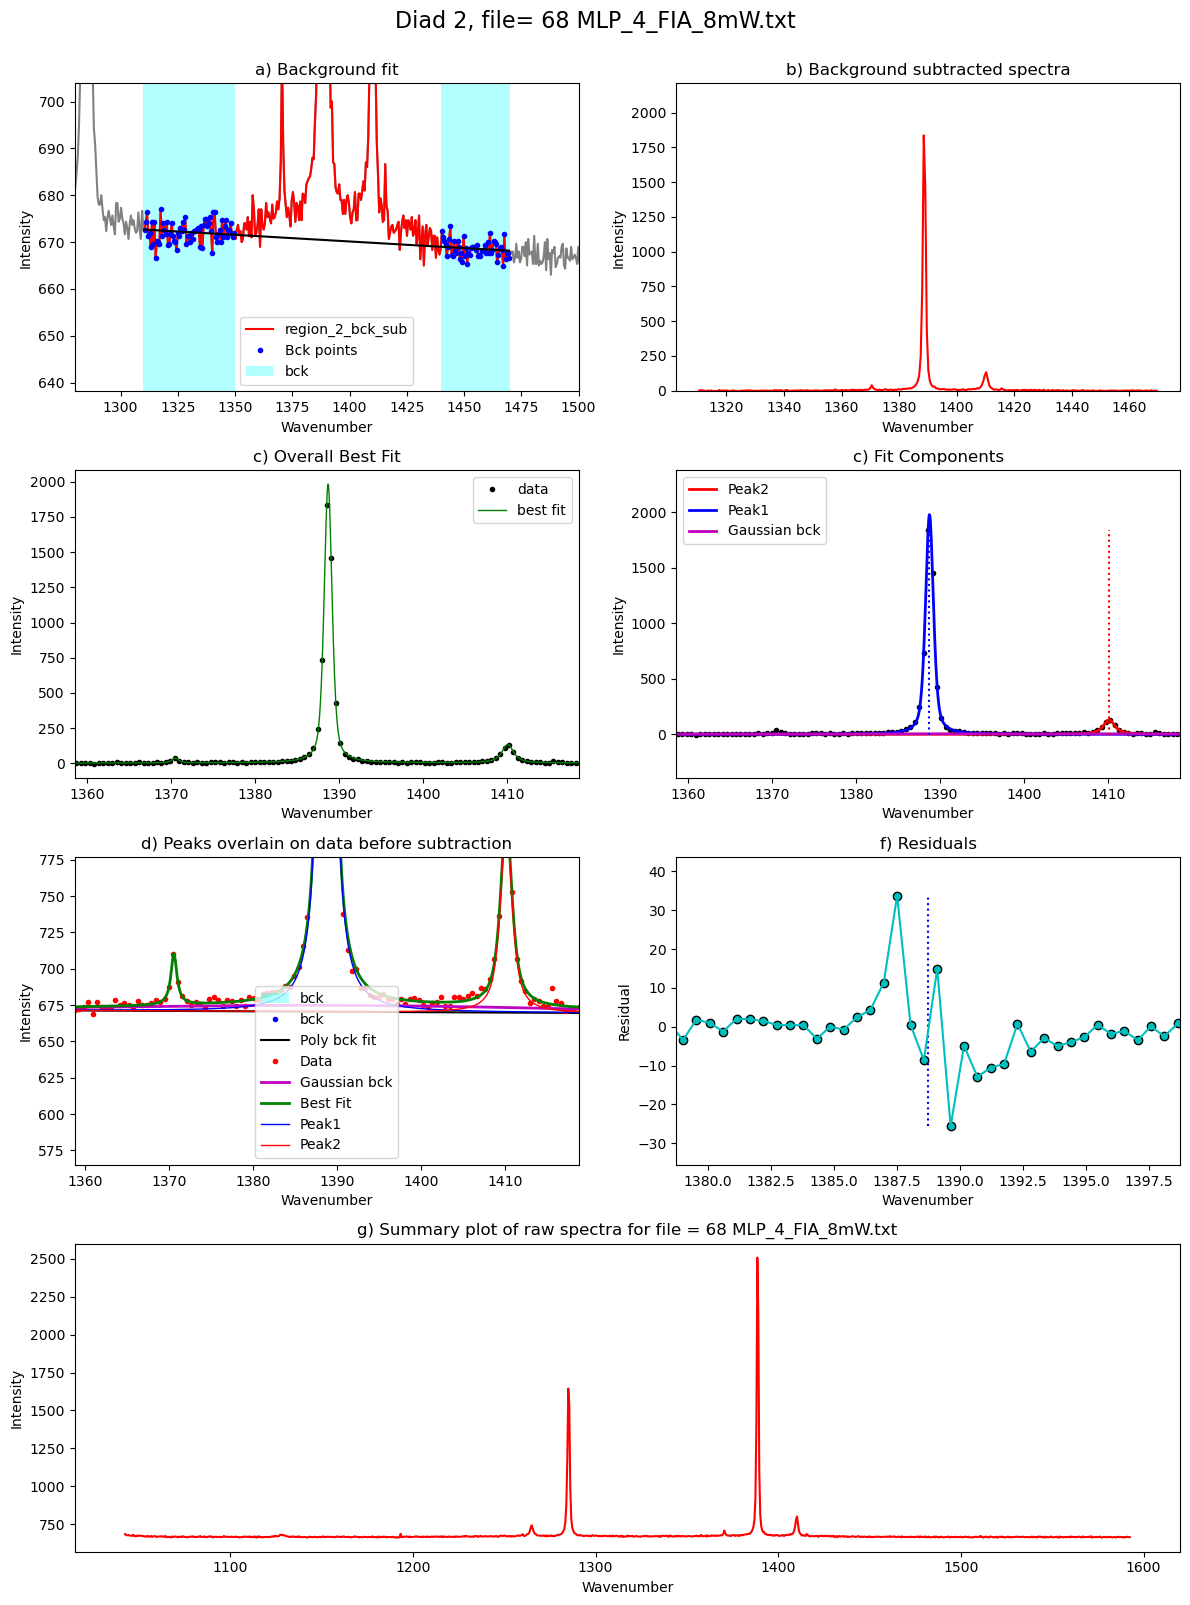

In [50]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself
to_clipboard=False # Copies to clipboard
Diad_Files_Dense_i=Diad_Files_Dense
df_Dense = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files_Dense))): #
    
    filename=Diad_Files_Dense[i]

    generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
filename=filename, filetype=filetype)


    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=False)

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)
    
    
    
    data=pf.combine_diad_outputs(filename=filename, prefix=False, 
Diad1_fit=Diad1_fit, path=spectra_path,
 to_clipboard=to_clipboard,                    
Diad2_fit=Diad2_fit, Carb_fit=generic_fit)
    
 

    df_Dense = pd.concat([df_Dense, data], axis=0)


## Here are some figures to inspect the relationship between residuals and areas etc. 

In [51]:
# These ones triggered at least one warning, so need to be refit
refit_d1=(df_Dense['Diad1_refit']==True)
refit_d2=(df_Dense['Diad2_refit']==True)
refit=refit_d1|refit_d2

In [52]:
sum(refit_d2)

0

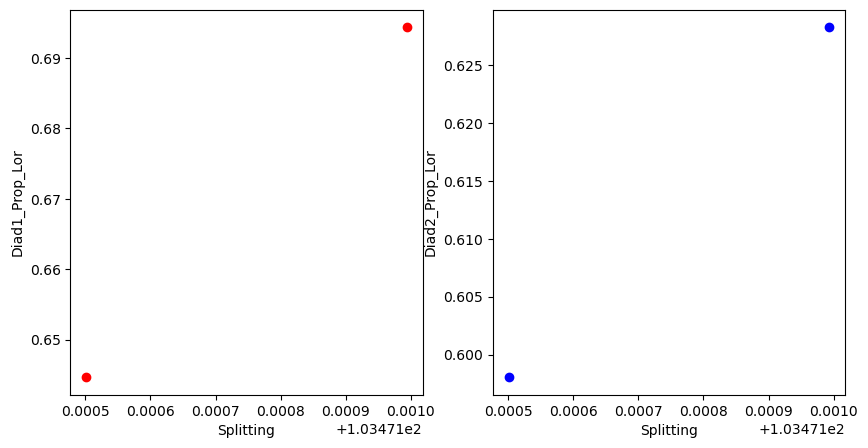

In [53]:

x='Splitting'
y1='Diad1_Prop_Lor'
y2='Diad2_Prop_Lor'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Dense[x], df_Dense[y1], 'or')
ax2.plot(df_Dense[x], df_Dense[y2], 'ob')
ax1.plot(df_Dense[x].loc[refit_d1], df_Dense[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Dense[x].loc[refit_d2], df_Dense[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Dense=df_Dense #.loc[(df_Dense['Diad1_Voigt_Area']>25) & (df_Dense['Diad2_Voigt_Area']>30)]

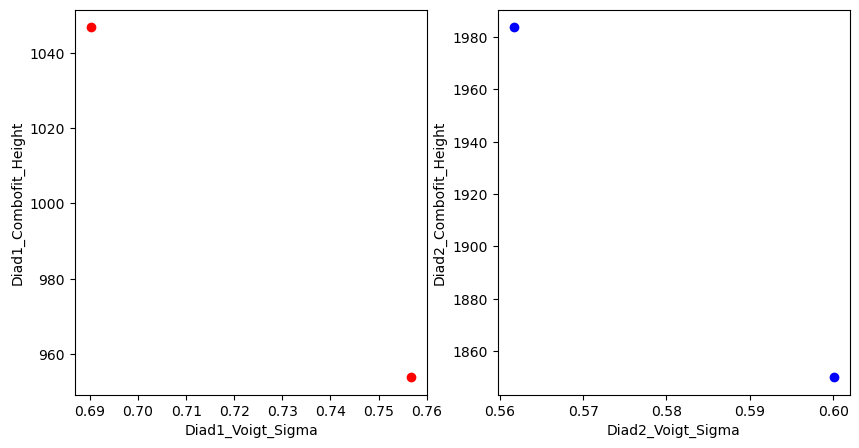

In [54]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Dense[x1], df_Dense[y1], 'or')
ax2.plot(df_Dense[x2], df_Dense[y2], 'ob')
ax1.plot(df_Dense[x1].loc[refit_d1], df_Dense[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Dense[x2].loc[refit_d2], df_Dense[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Dense=df_Dense #.loc[(df_Dense['Diad1_Voigt_Area']>25) & (df_Dense['Diad2_Voigt_Area']>30)]

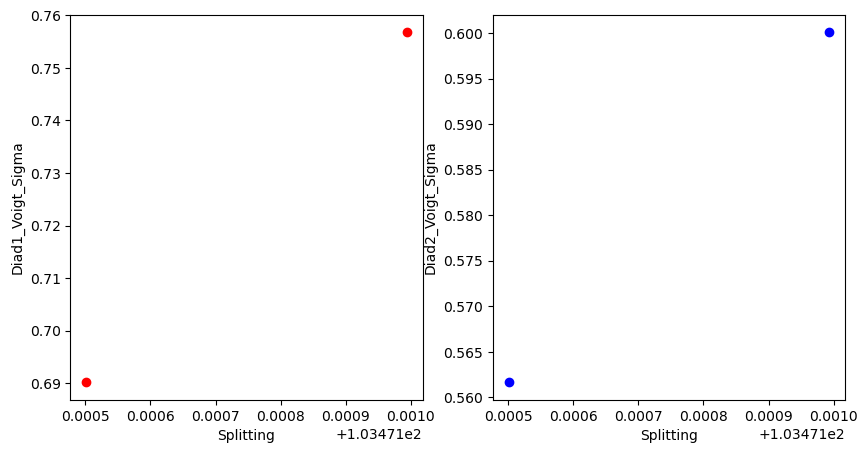

In [55]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Dense[x], df_Dense[y1], 'or')
ax2.plot(df_Dense[x], df_Dense[y2], 'ob')
ax1.plot(df_Dense[x].loc[refit_d1], df_Dense[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Dense[x].loc[refit_d2], df_Dense[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Dense=df_Dense #.loc[(df_Dense['Diad1_Voigt_Area']>25) & (df_Dense['Diad2_Voigt_Area']>30)]

In [56]:
df_anom=df_Dense.loc[refit]
df_anom['filename']

Series([], Name: filename, dtype: object)

## Can save right now if you dont need to refit any

In [59]:
df_Dense.to_excel('Dense_Diads.xlsx')

In [58]:
if len(df_anom)>0:

    filename_refit=df_anom['filename'].iloc[0] + file_ext



    diad1_fit_config_refit=pf.diad1_fit_config(model_name=model_name,
    diad_sigma=0.3, sigma_allowance=1.1,
    x_range_residual=10, 
    x_range_baseline=30, HB_amplitude=5, diad_amplitude=100)


    diad2_fit_config_refit=pf.diad2_fit_config(model_name=model_name,
    diad_sigma=0.2, sigma_allowance=1.1,  
                                x_range_residual=10, 
                                diad_amplitude=400, 
                            x_range_baseline=30)
    diad2_fit_config


    Diad1_refit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_refit,
        config2=diad_id_config, peak_pos_voigt=diad1_peaks,
    path=spectra_path, filename=filename_refit, filetype=filetype, close_figure=False)



    Diad2_refit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_refit,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,                              
    path=spectra_path, filename=filename_refit, filetype=filetype, close_figure=False)



    data_refit=pf.combine_diad_outputs(filename=filename, prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,
     to_clipboard=to_clipboard,                    
    Diad2_fit=Diad2_fit, Carb_fit=generic_fit)

    data_refit

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\diads.py:721: UserWarning: Diad fit right at the lower limit of the allowed fit parameter, change diad_sigma in the  diad1 config file
  w.warn('Diad fit right at the lower limit of the allowed fit parameter, change diad_sigma in the  diad1 config file')
 25%|█████████████████████                                                               | 1/4 [00:01<00:05,  1.92s/it]g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\diads.py:721: UserWarning: Diad fit right at the lower limit of the allowed fit parameter, change diad_sigma in the  diad1 config file
  w.warn('Diad fit right at the lower limit of the allowed fit parameter, change diad_sigma in the  diad1 config file')
g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\diads.py:1143: UserWarning: Diad fit right at the upper limit of the allowed fit parameter, change 

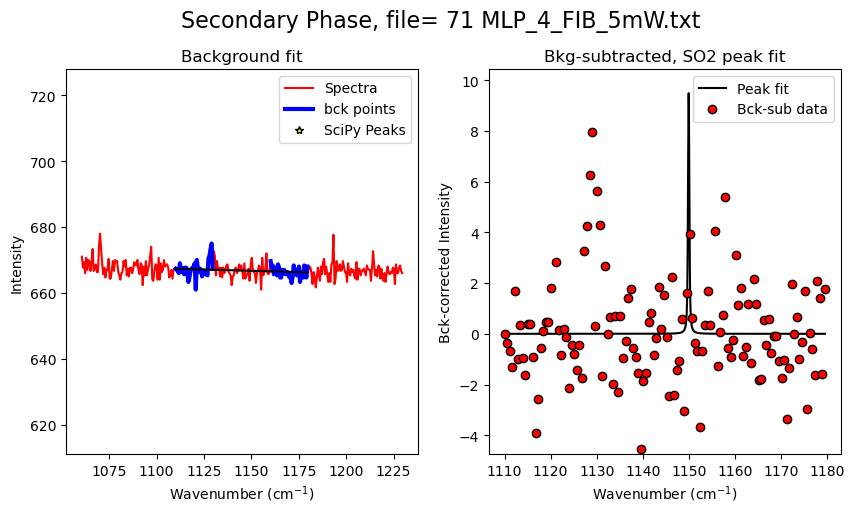

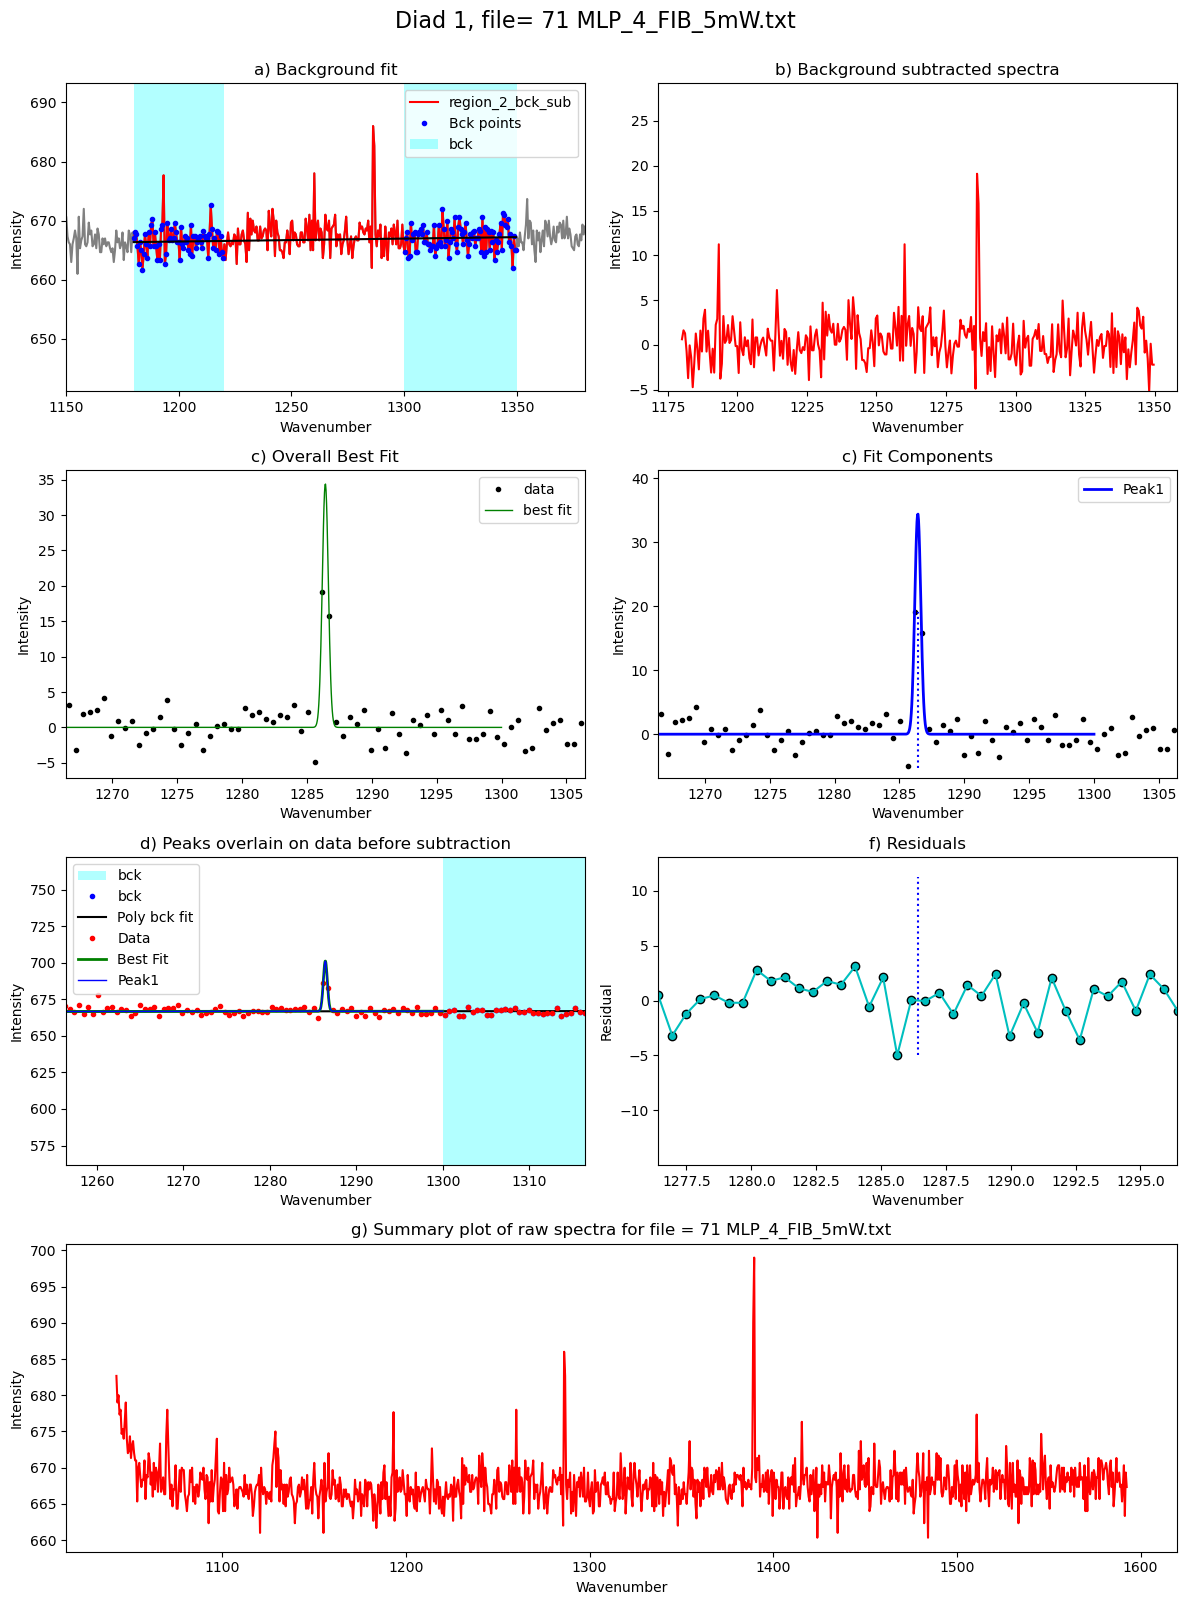

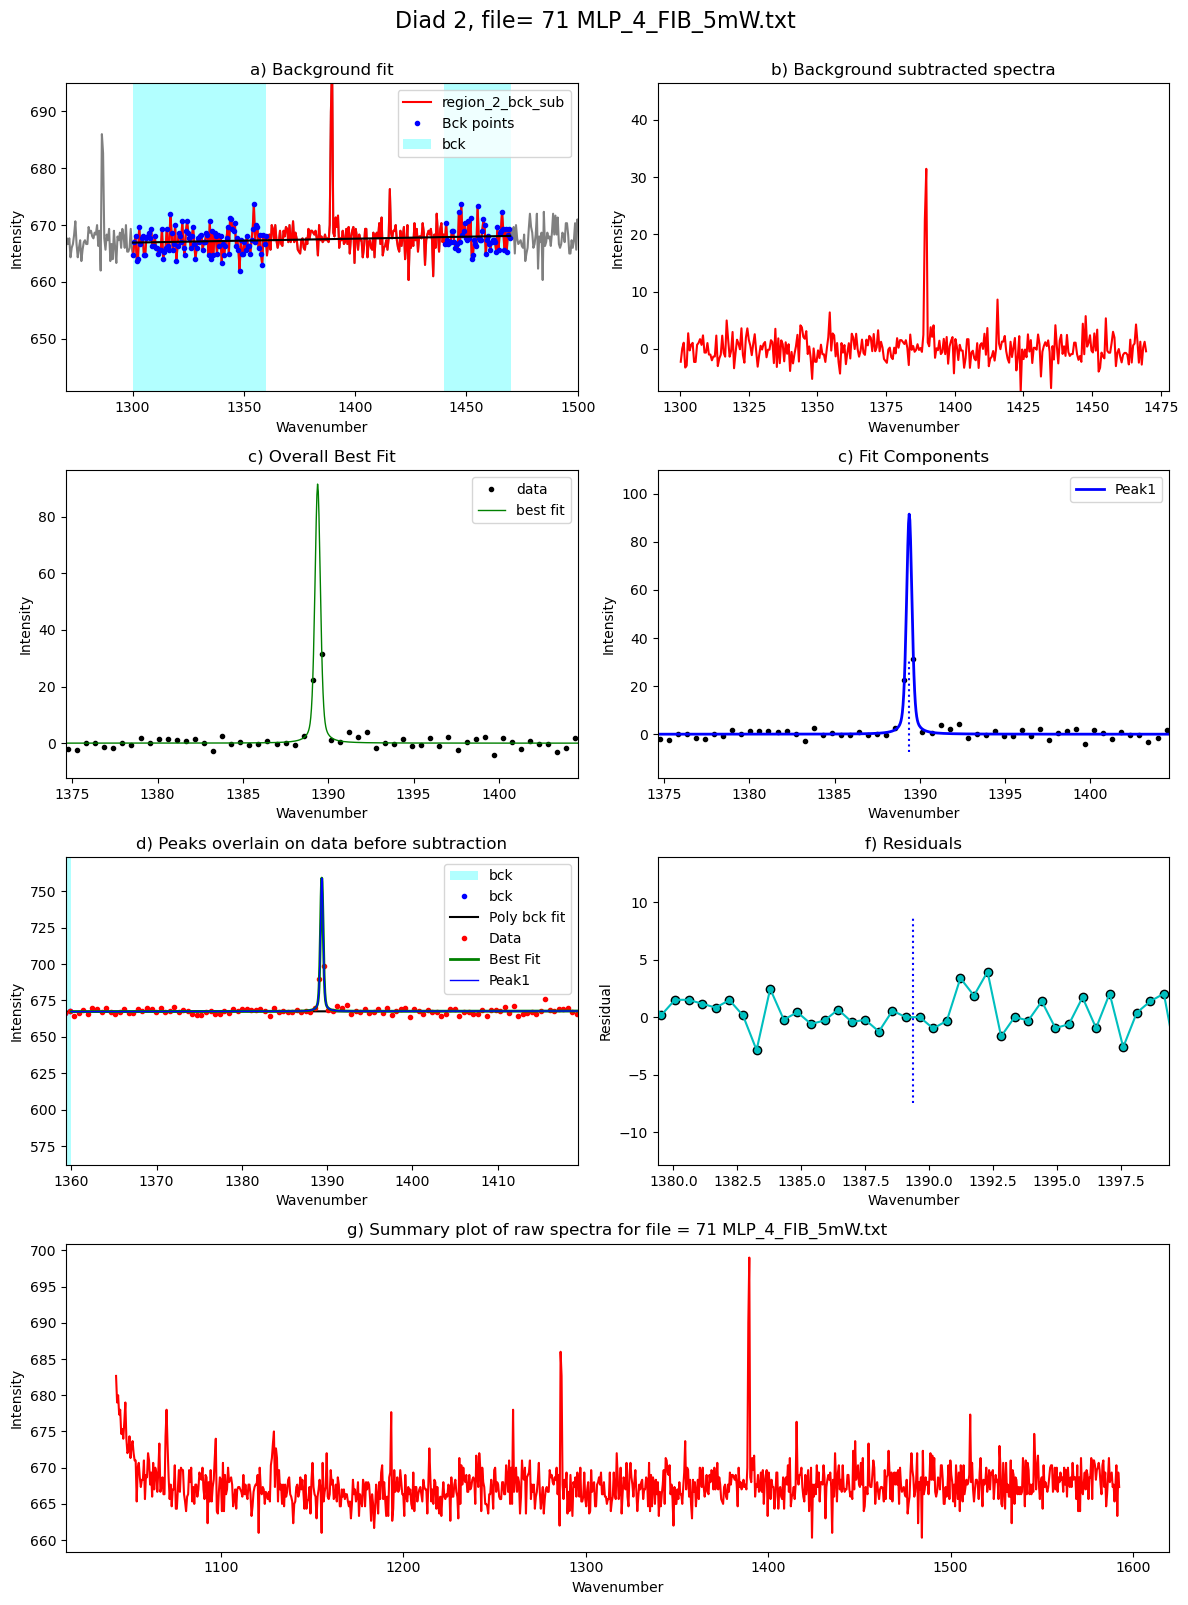

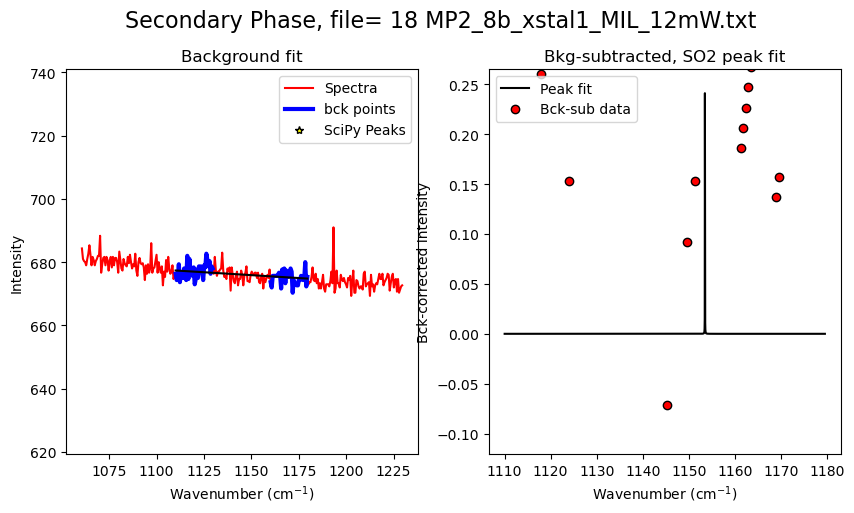

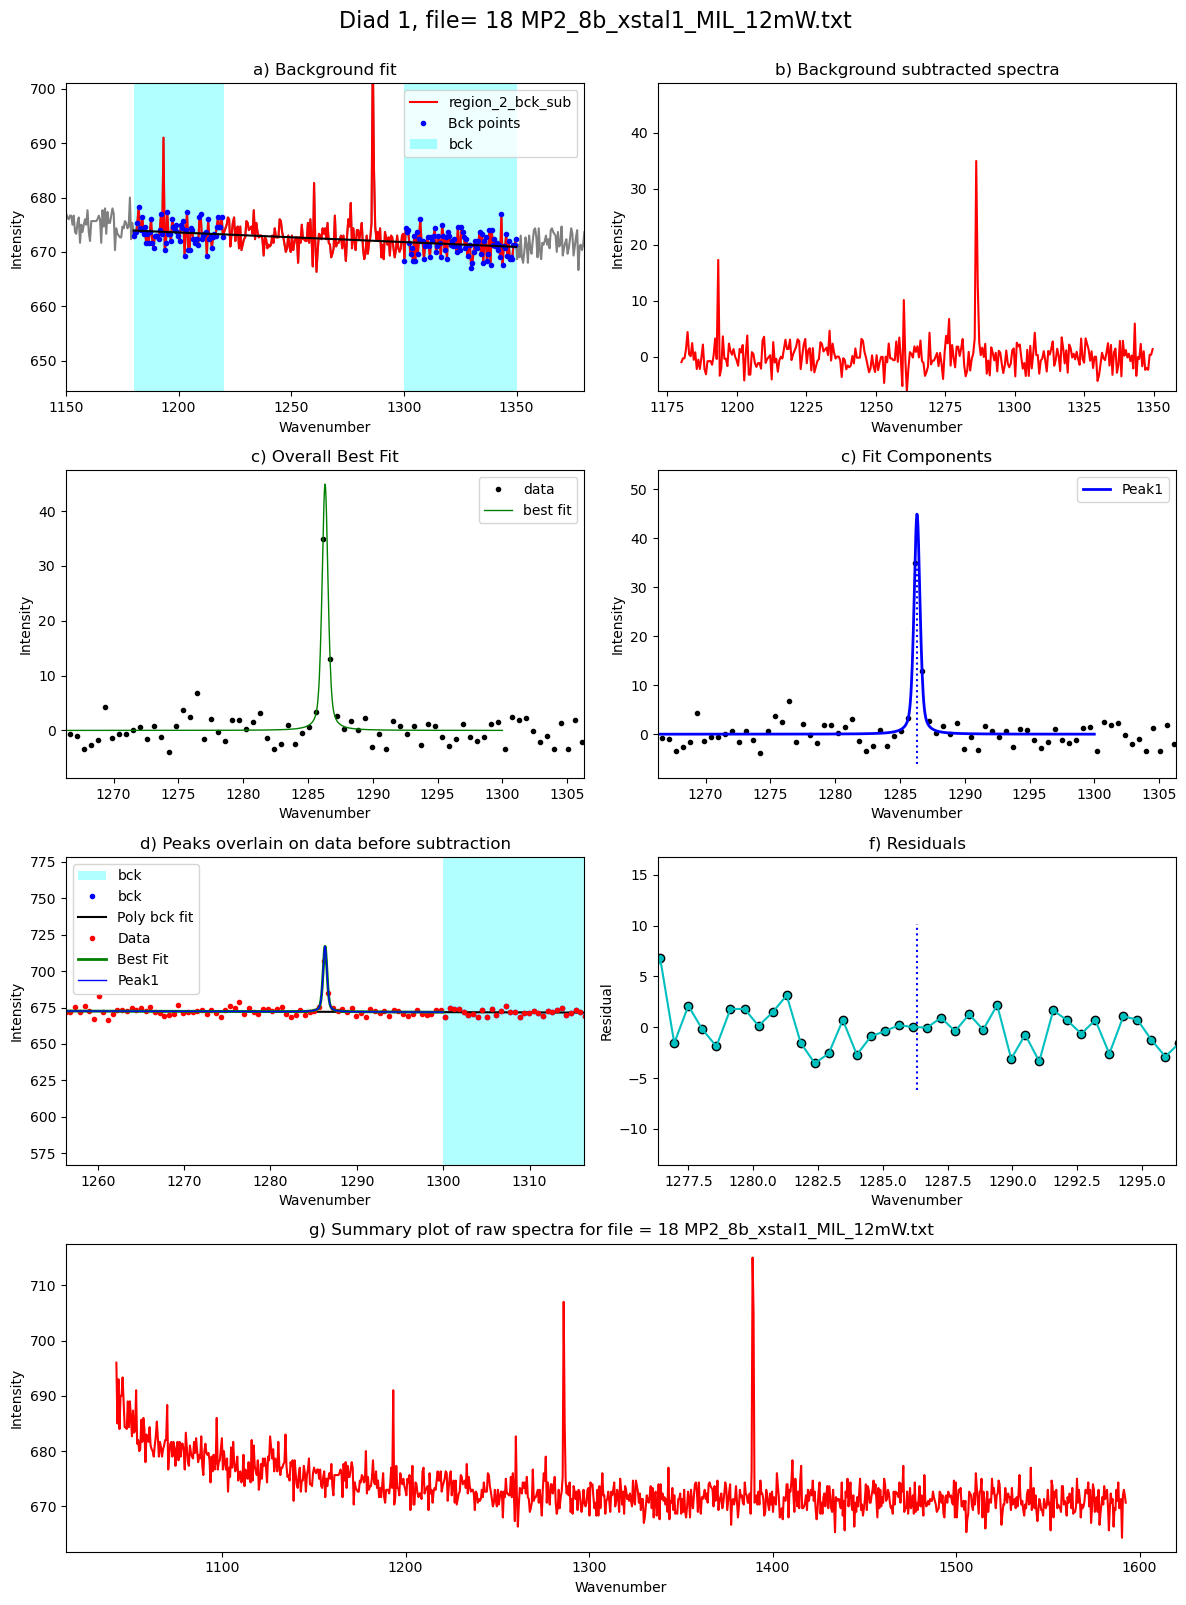

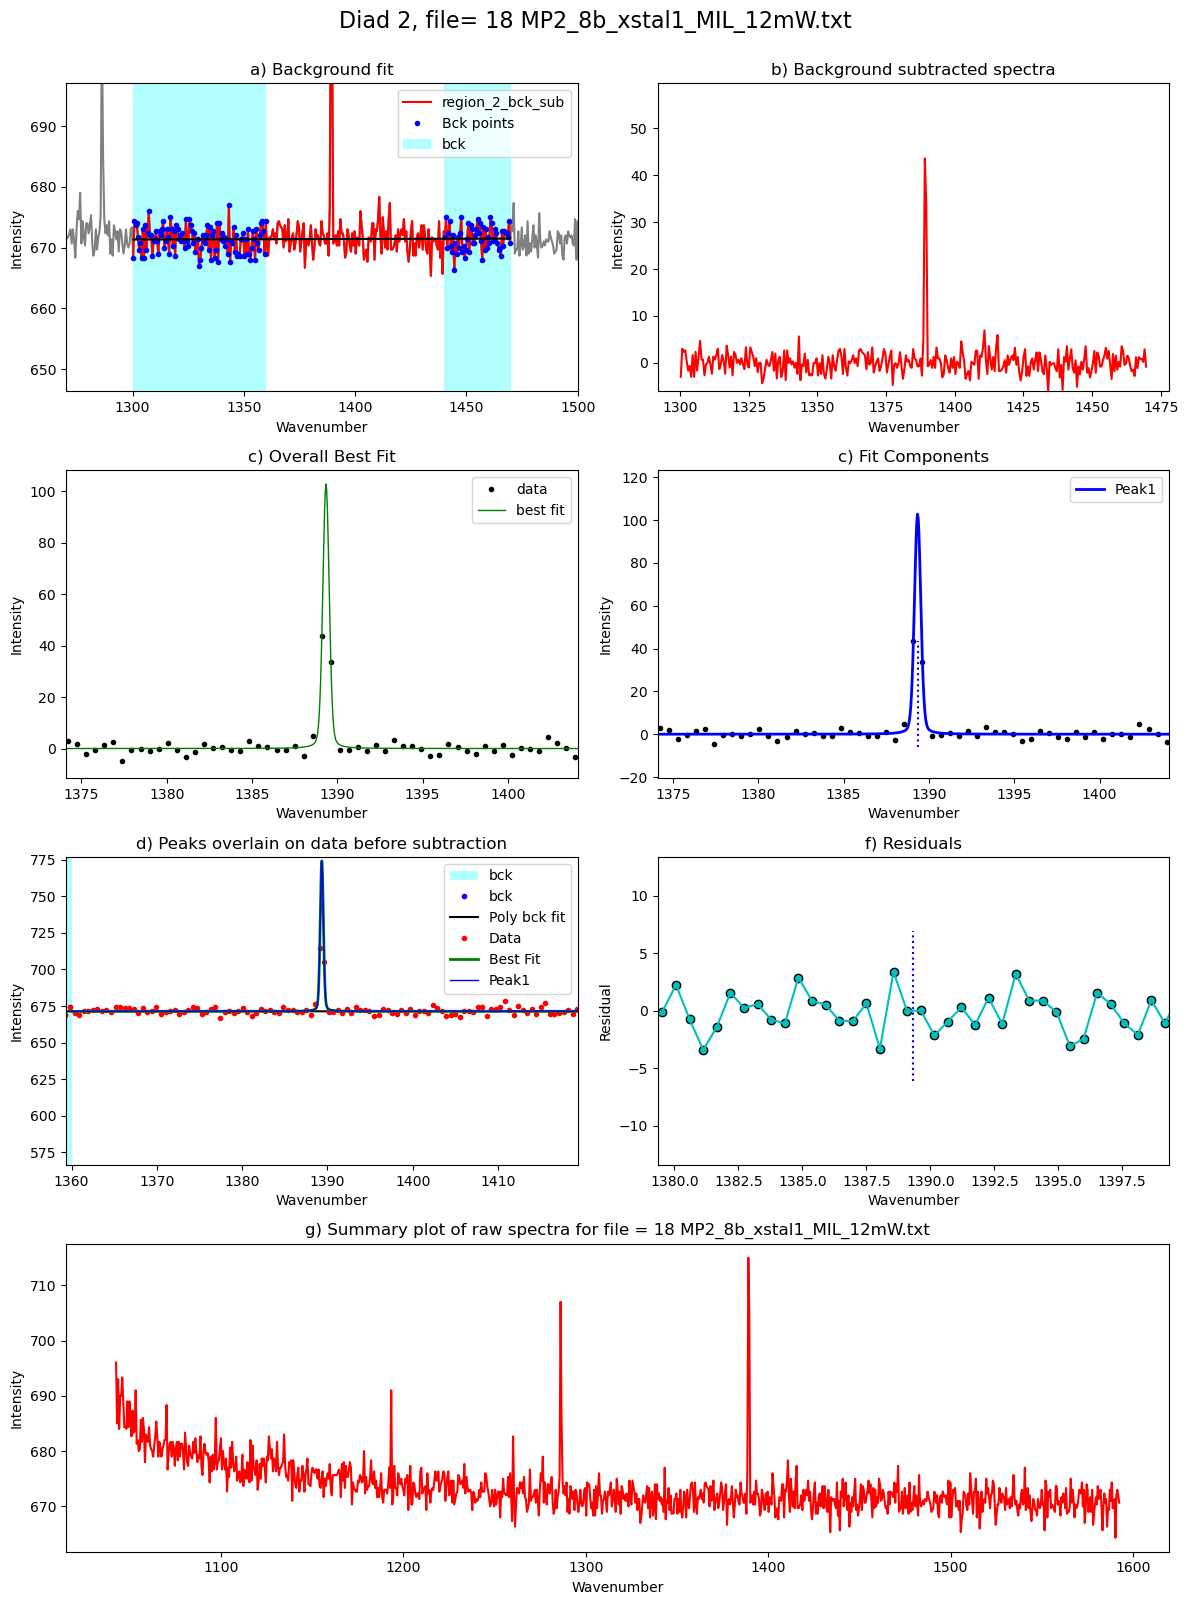

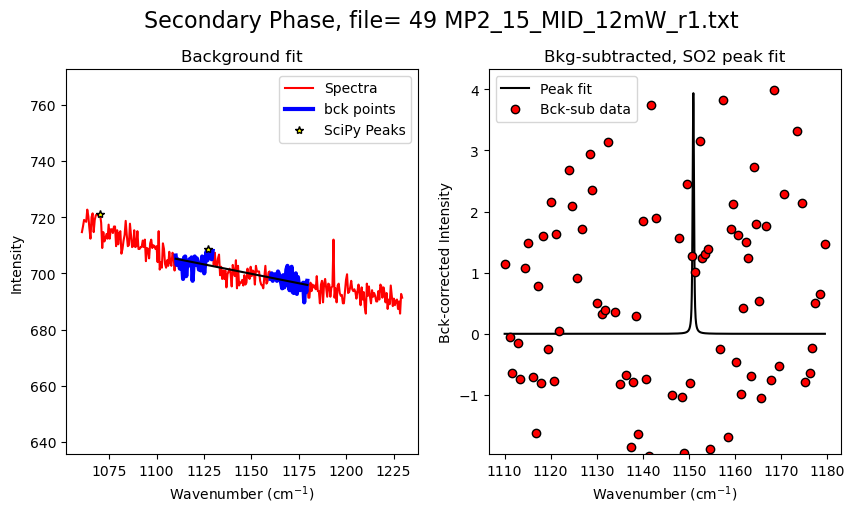

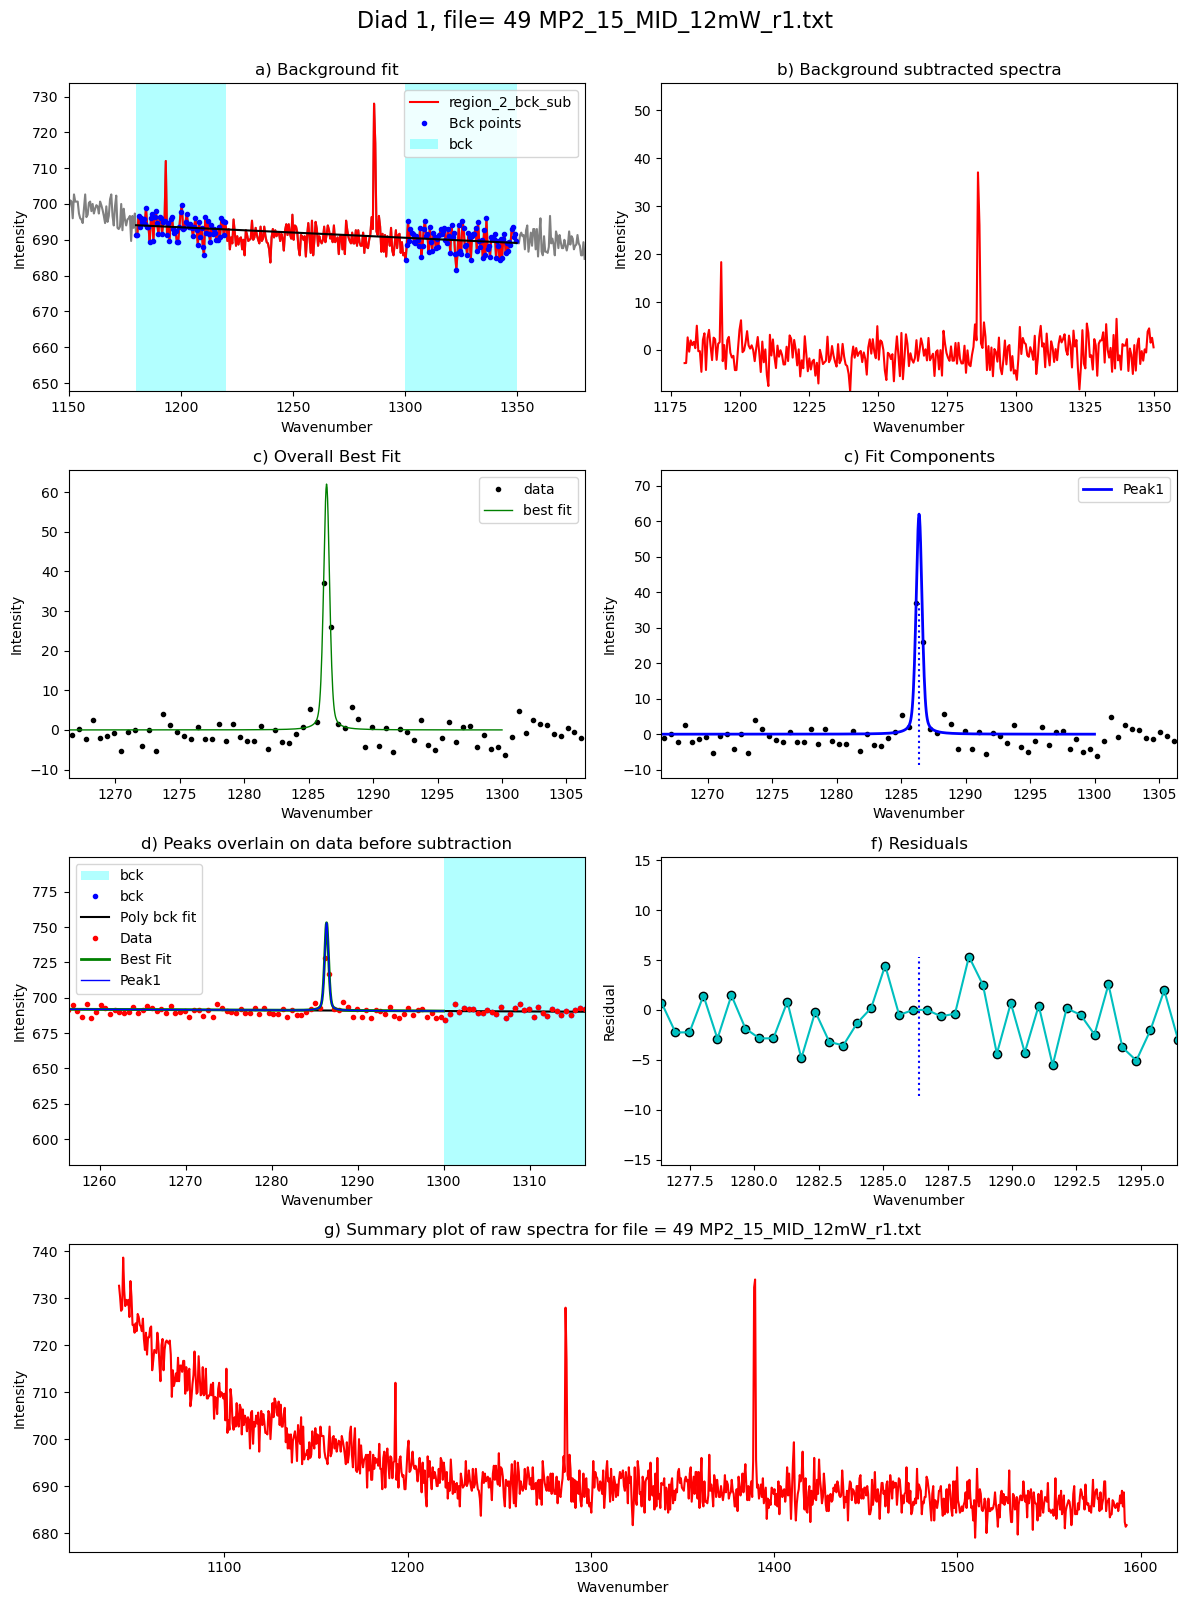

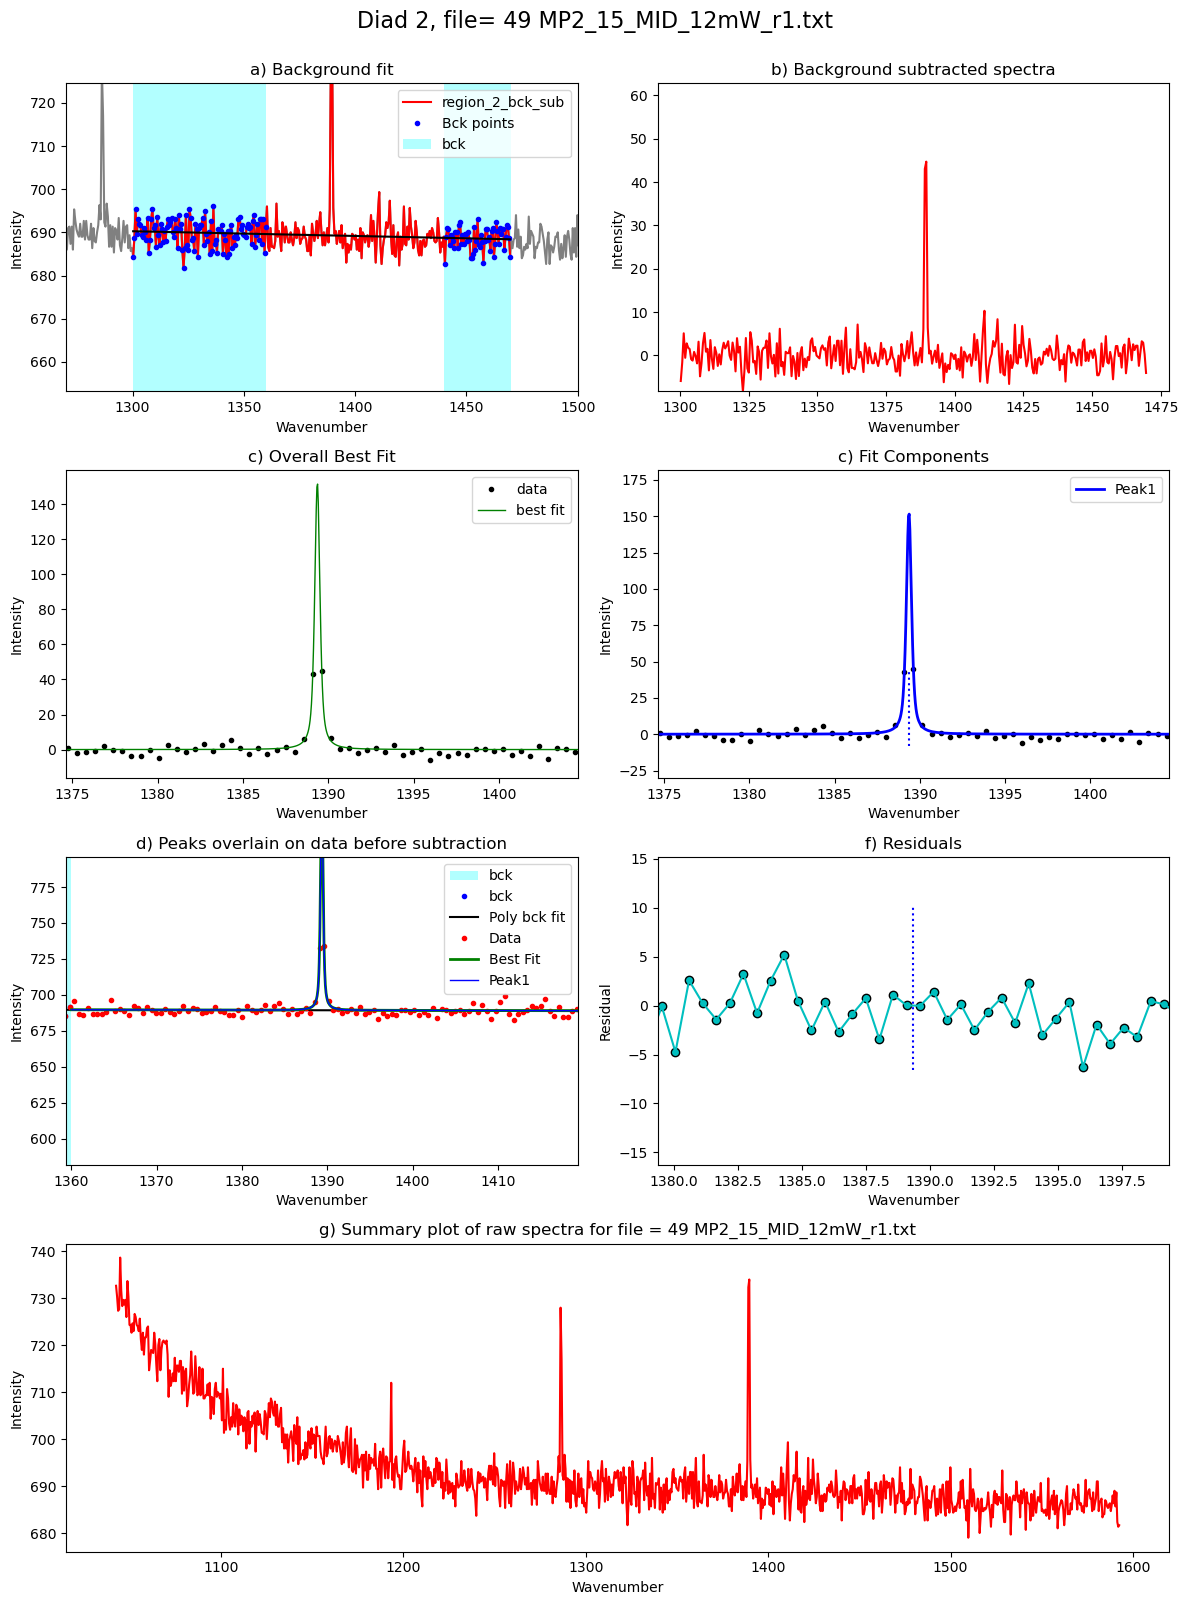

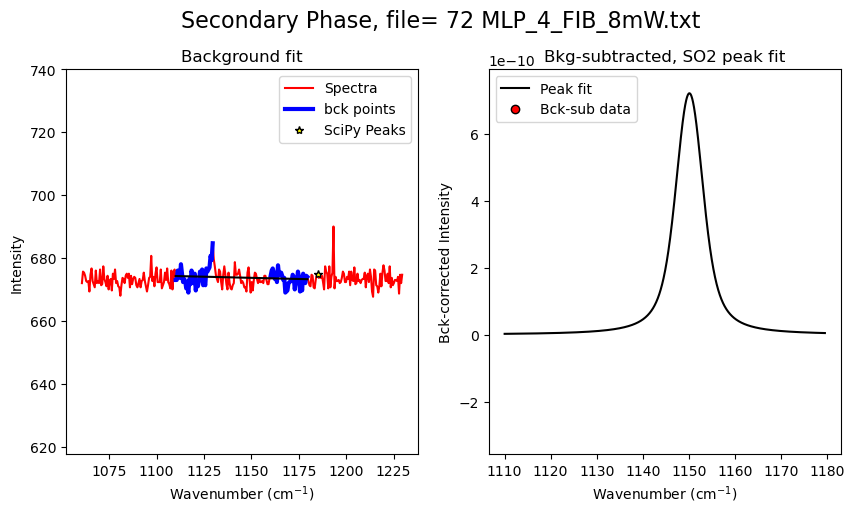

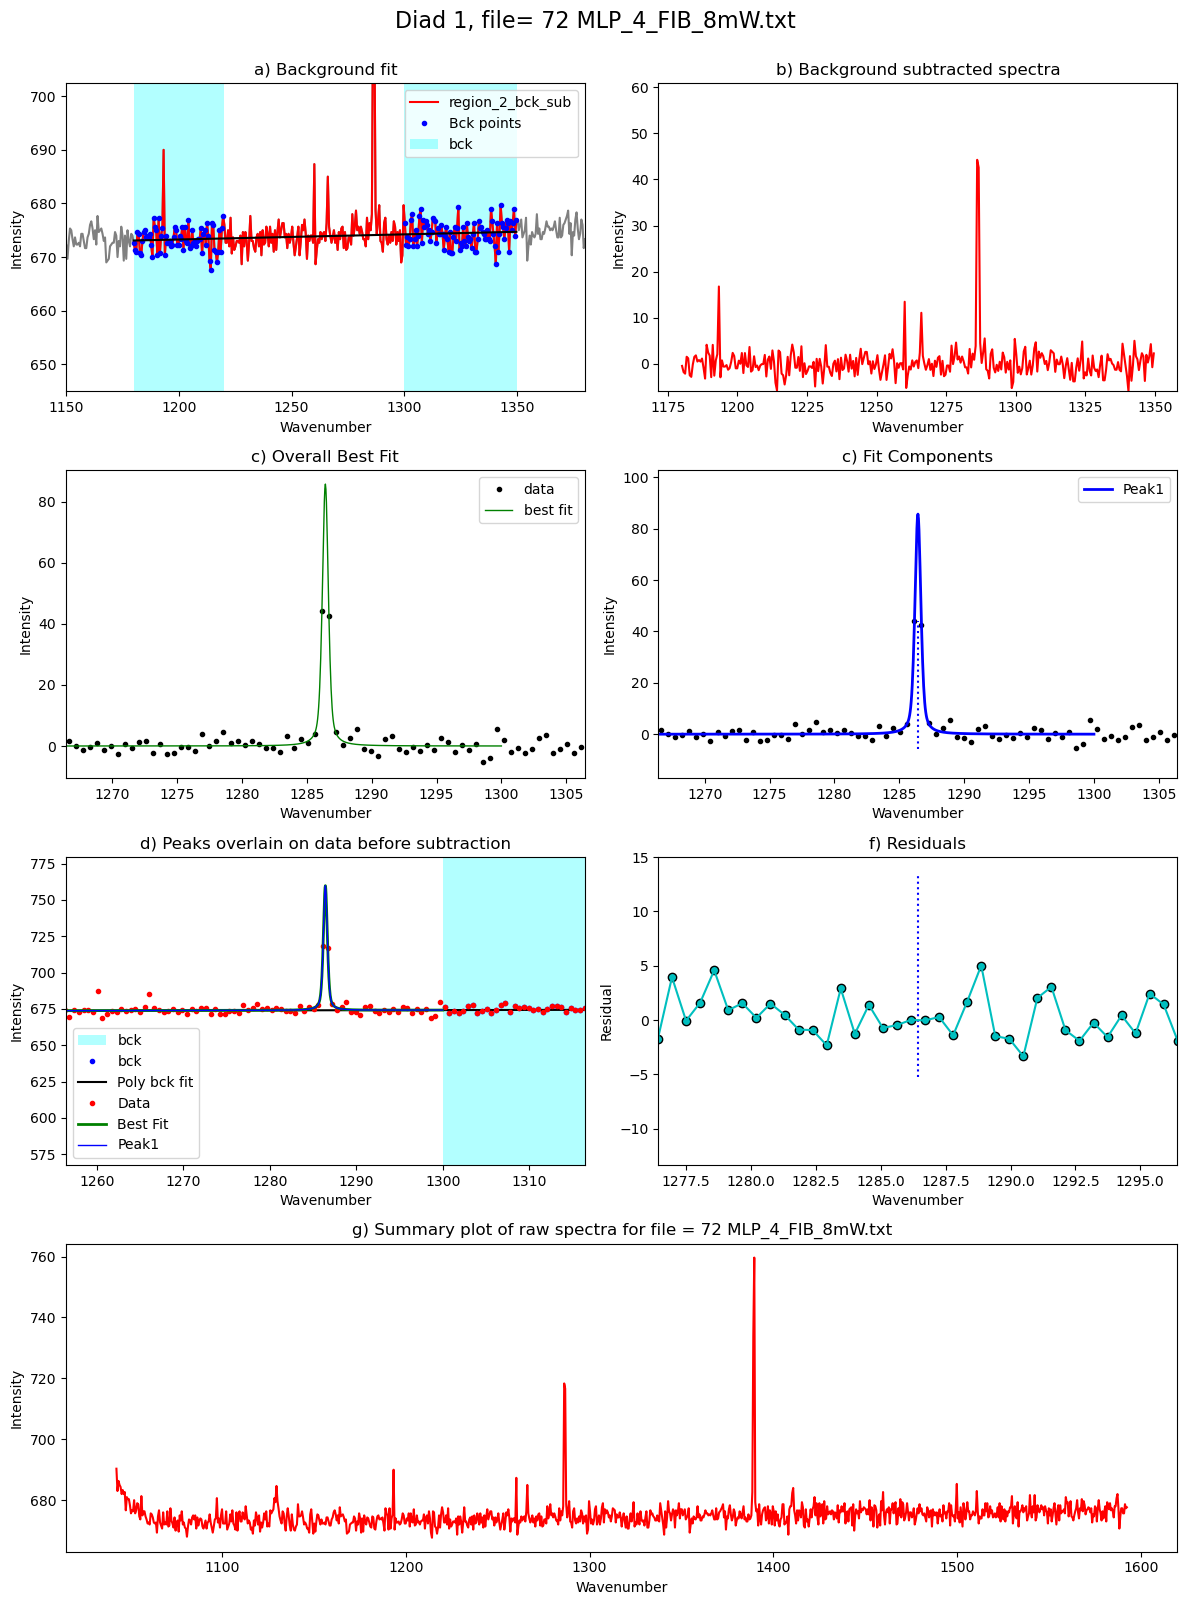

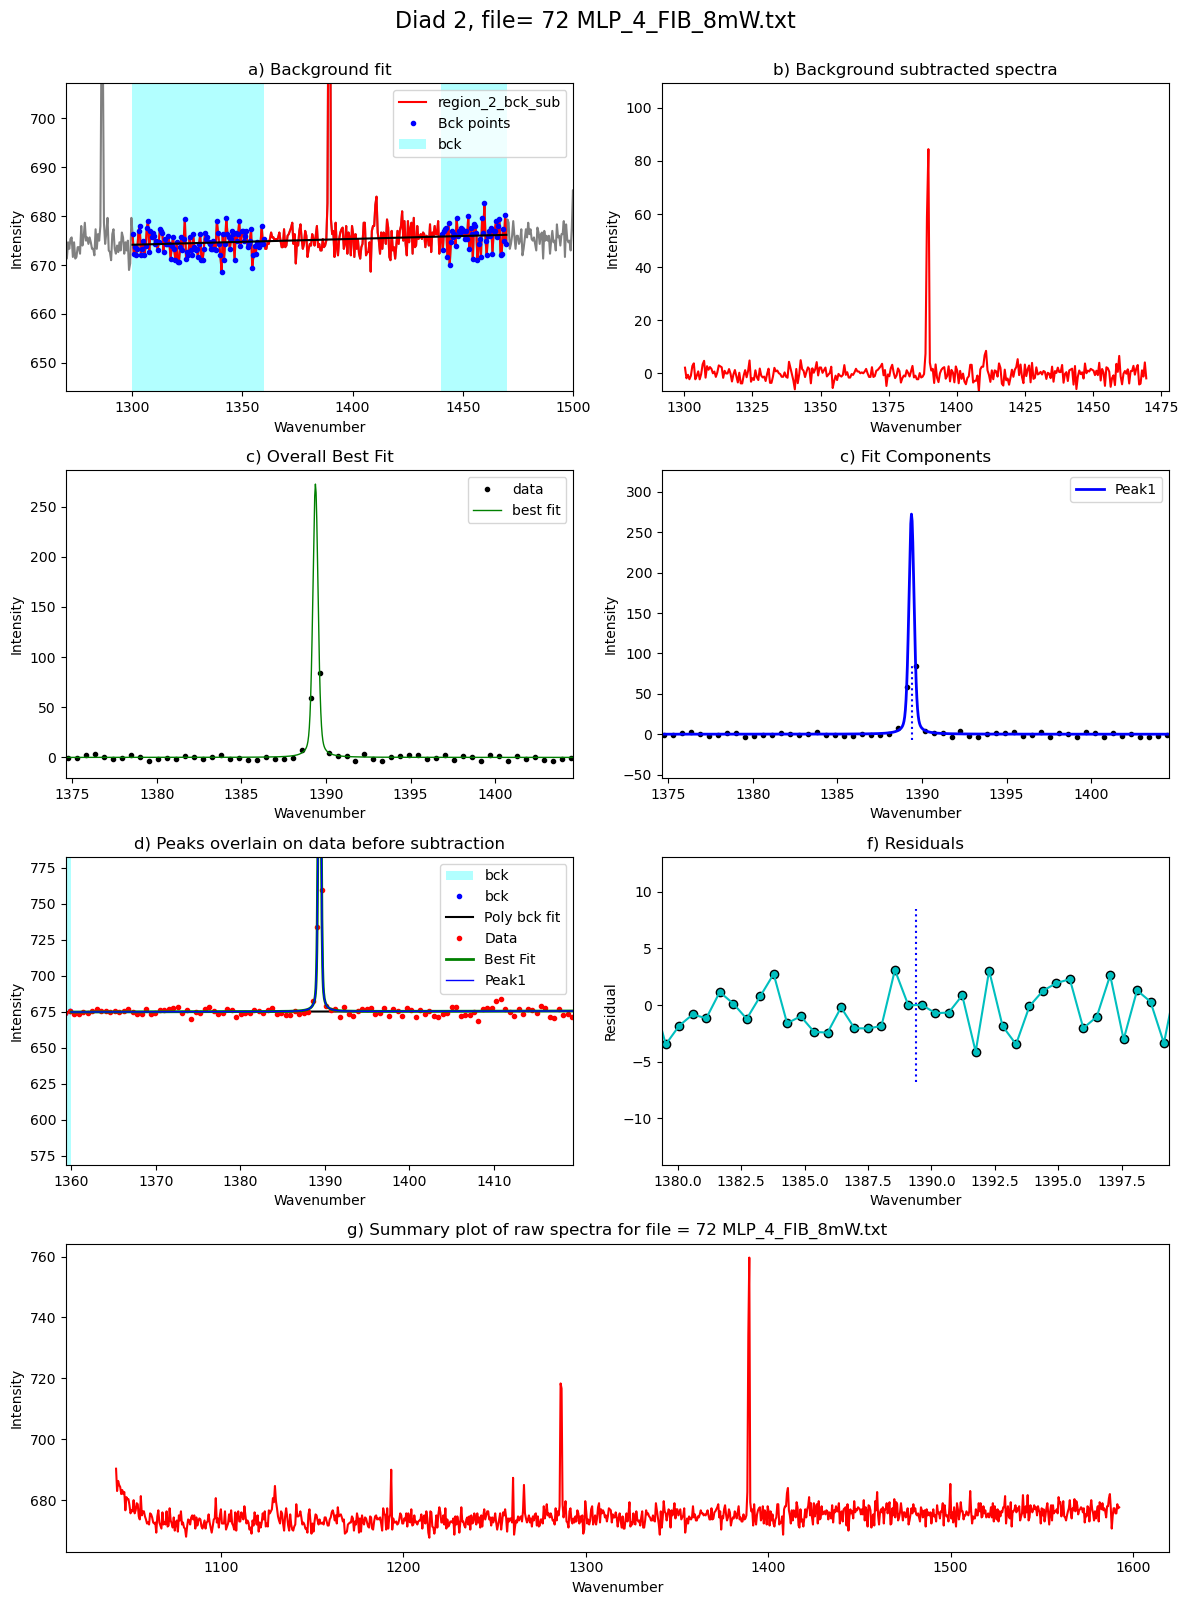

In [36]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself
to_clipboard=False # Copies to clipboard

df_Dense_refit = pd.DataFrame([])
for i in tqdm(range(0, len(df_anom))):
    
    filename=df_anom['filename'].iloc[i] + file_ext

    generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
filename=filename, filetype=filetype)


    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=False)

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_refit,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_refit,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)
    
    
    
    data_refit=pf.combine_diad_outputs(filename=filename, prefix=False, 
Diad1_fit=Diad1_fit, path=spectra_path,
 to_clipboard=to_clipboard,                    
Diad2_fit=Diad2_fit, Carb_fit=generic_fit)
    
 

    df_Dense_refit = pd.concat([df_Dense_refit, data_refit], axis=0)

## Insert this into the dataframe

In [37]:
## First remove the bad rows from the old dataframe
Keep=df_Dense.loc[~refit]
combo=pd.concat([df_Dense, df_Dense_refit], axis=0)

In [38]:
combo.to_excel('Dense_Diads.xlsx')